# <center>Project-Based Assignment CLO-4</center>

<b>Topic</b>
Implementation of Ensemble Method on Classification Task

<b>Group Member</b>
1. Fauzan Rizqi Muhammad - 1301213181
2. Anaz Akbar Azhar - 1301213291
3. Ridla Aliya Gani - 1301213042

#### Background
In the realm of machine learning, the effective implementation of ensemble methods on classification tasks has emerged as a powerful technique for enhancing model performance. In our project, we have chosen to delve into this exciting domain by utilizing the UCI dataset, specifically tailored for a classification task related to diabetes prediction. Our primary focus is on harnessing the potential of the Random Forest ensemble method, a robust and versatile algorithm known for its ability to handle complex data while mitigating overfitting. Our journey begins with meticulous data preprocessing and exploration, where we take the time to cleanse and understand the intricacies of our dataset. This initial stage sets the foundation for a successful ensemble approach.

As we progress, we embark on a comprehensive journey through model development. We initiate with the creation of a baseline model, allowing us to gauge the starting point for our ensemble's improvement. Here, we tap into the power of Random Forest, one of the most trusted ensemble methods, to build our initial classifier. Furthermore, we venture into model exploration, where we extend our analysis to include the AdaBoost ensemble method. By experimenting with both Random Forest and AdaBoost, we gain valuable insights into the strengths and weaknesses of these ensemble techniques, allowing us to make informed decisions for model selection. Finally, we engage in rigorous model evaluation, employing various evaluation metrics such as accuracy, precision, recall, and F1-score to comprehensively assess the performance of our classifiers. Through these steps, we aim to showcase the significance of ensemble methods in enhancing the predictive capabilities of machine learning models, particularly in the context of diabetes classification.

####Importing Libraries

In [1]:
%pip install gdown
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install lightgbm
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

####Dataset Exploring
In this section, we will commence our analysis by exploring the dataset. The dataset, loaded from '/content/Dataset.csv', will be examined in terms of its structure, information, and initial statistics. This initial step is crucial for gaining insights into the dataset's composition and characteristics before proceeding with further data preprocessing and model development.



In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.head(20)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [6]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


####Data Pre processing
In this section, we undertake a comprehensive data preprocessing phase to prepare our dataset for further analysis and model development. Our approach includes addressing missing values, converting specific columns to integer data type, ensuring data integrity by identifying and removing duplicates, and gaining insights into the unique values within each attribute. These crucial steps serve as a solid foundation for ensuring the quality and suitability of our dataset for subsequent stages of our analysis.

In [7]:
missing_values = data.isnull().sum()
print(missing_values,'\n')

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 



In [8]:
# List of columns to be converted to integer type
columns_to_convert = [
    "Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI",
    "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity",
    "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
    "Sex", "Age", "Education", "Income"
]

# Convert each column in the list to integer type
for column in columns_to_convert:
    data[column] = data[column].astype(int)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [10]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [11]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")


In [12]:
v_counts(data)

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    144851
1    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    146089
1    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    244210
0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    141257
1    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    243388
1     10292
Name: count, dtype:

In [13]:
data.duplicated().sum()

23899

In [14]:
data.drop_duplicates(inplace = True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(229781, 22)

####EDA
In this section, we embark on the crucial phase of Exploratory Data Analysis (EDA) to gain deeper insights into our dataset's attributes and relationships. We begin by calculating and visualizing the correlation matrix, providing us with a valuable overview of feature interactions. Subsequently, we identify features with weak correlations to our target variable, "Diabetes_012," and remove them to refine our dataset.

Furthermore, we delve into the realm of outlier analysis, focusing on specific numerical features like "BMI" and "PhysHlth." Through robust statistical techniques, we detect and handle outliers, ensuring data integrity and the effectiveness of our subsequent modeling efforts. This EDA process plays a pivotal role in enhancing our understanding of the dataset and guiding our feature selection and preprocessing decisions.

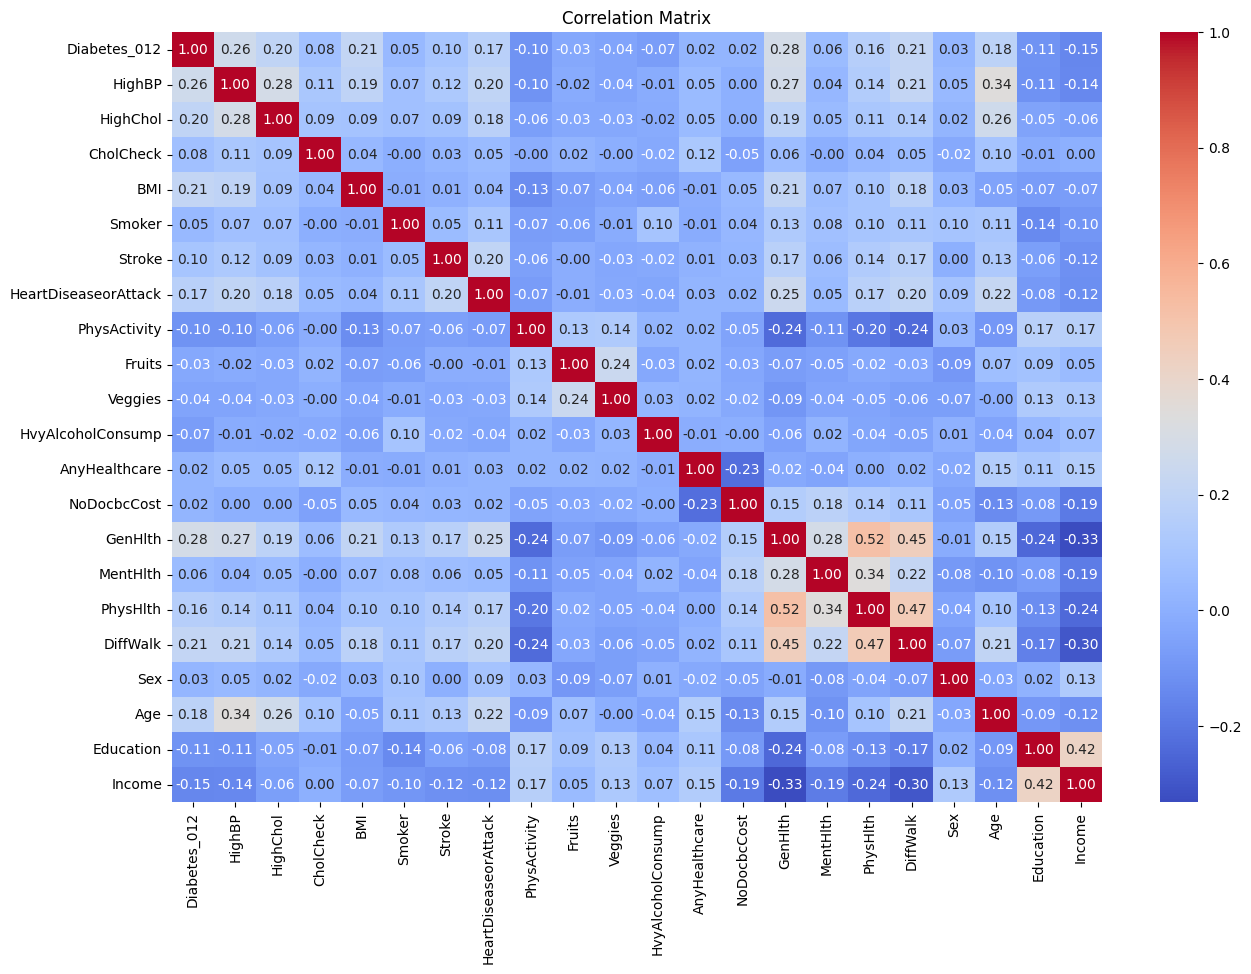

In [17]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
target_correlations = correlation_matrix['Diabetes_012'].sort_values()
target_correlations

# Identifying features with weak correlation (between -0.1 and 0.1)
weak_correlations = target_correlations[(target_correlations > -0.1) & (target_correlations < 0.1)]
weak_correlations.index.tolist()

['HvyAlcoholConsump',
 'Veggies',
 'Fruits',
 'NoDocbcCost',
 'AnyHealthcare',
 'Sex',
 'Smoker',
 'MentHlth',
 'CholCheck']

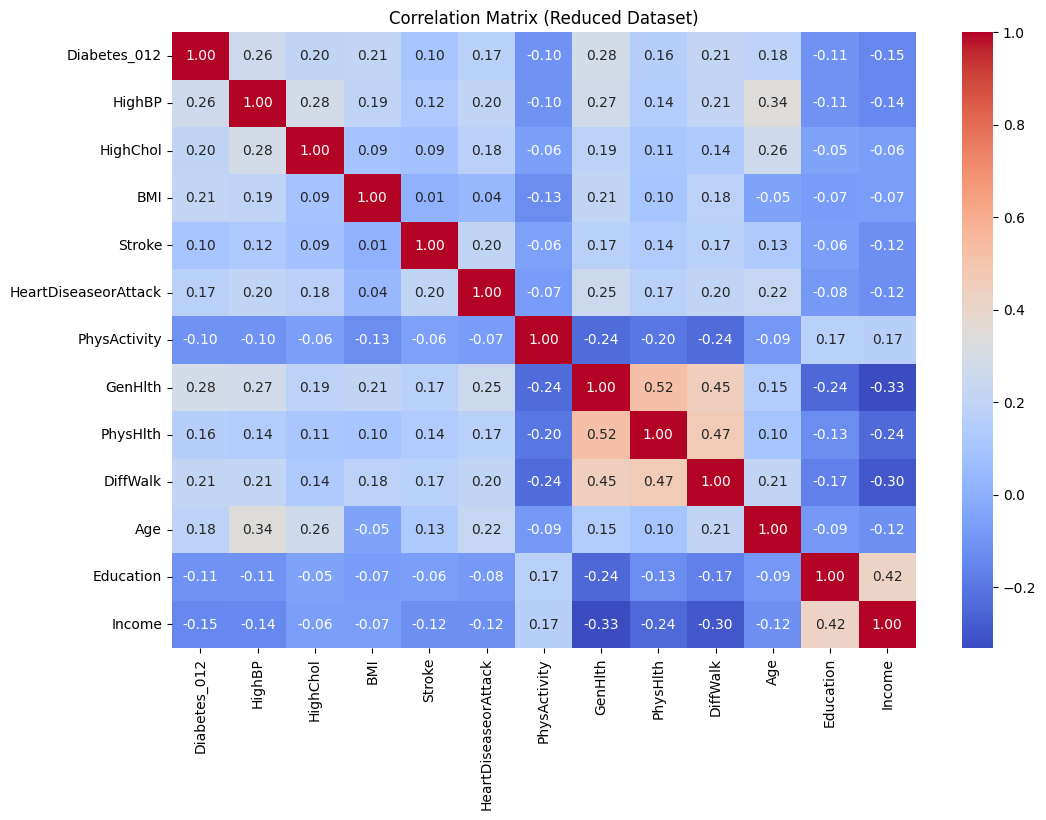

In [19]:
data = data.drop(columns=weak_correlations.index)

# Recalculating the correlation matrix for the reduced dataset
correlation_matrix_reduced = data.corr()

# Plotting the heatmap for the reduced correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Reduced Dataset)")
plt.show()

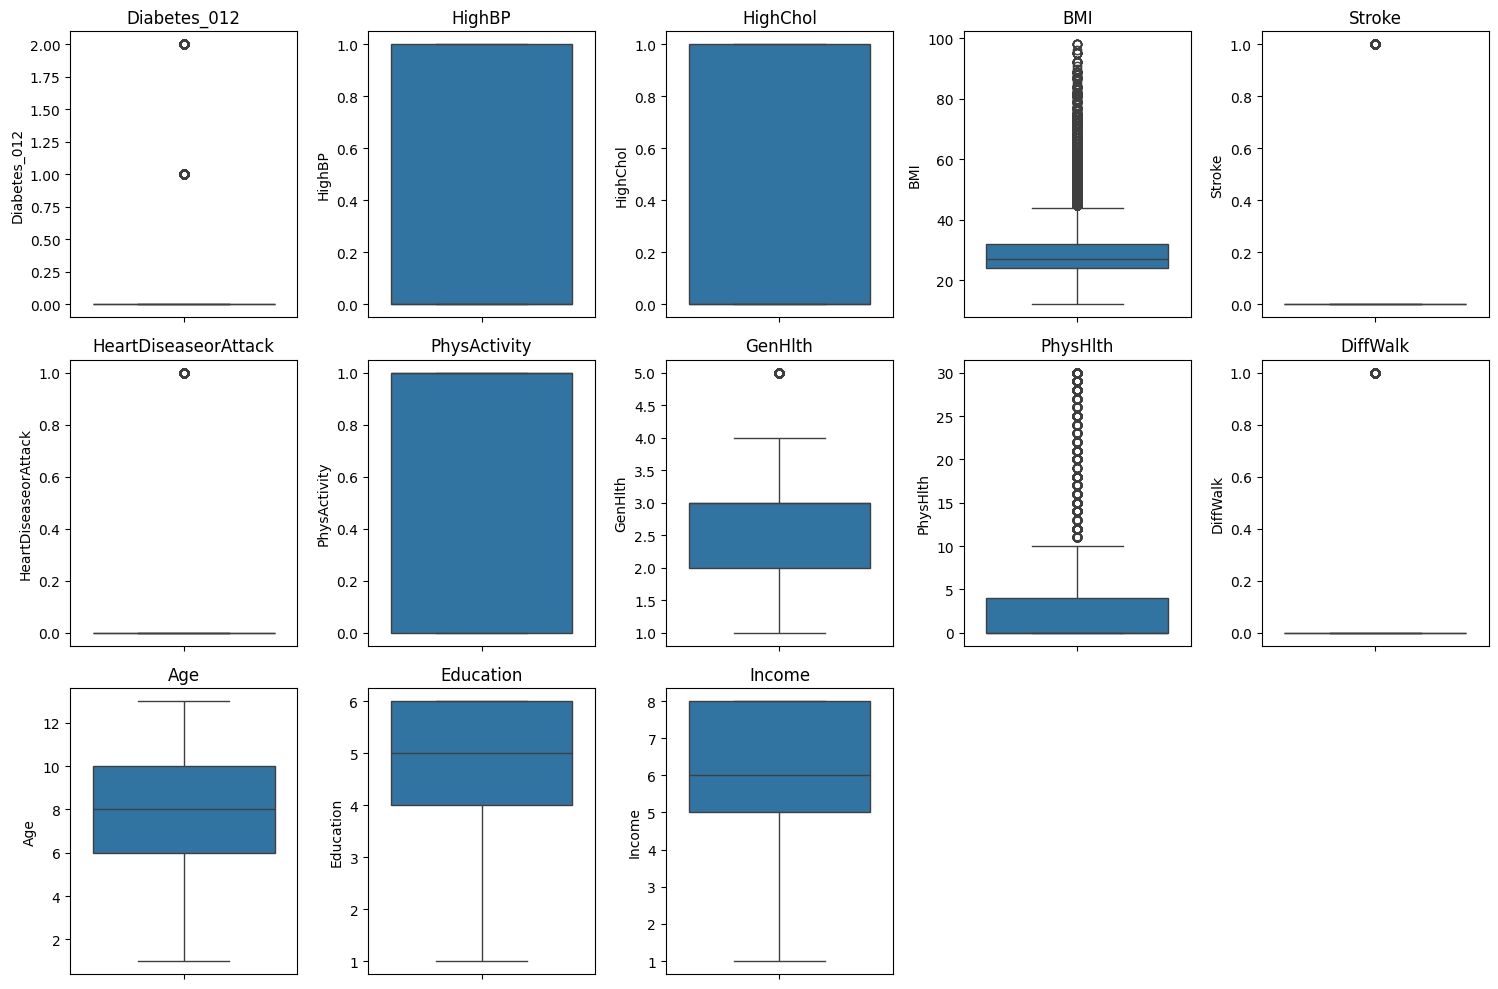

In [20]:
# Selecting numerical features for outlier analysis
subset_numerical_features = data.select_dtypes(include=['int64']).columns.tolist()
# Re-attempting to create box plots for the subset of numerical features
plt.figure(figsize=(15, 10))

# Adjusting the number of subplots to match the number of features
for i, feature in enumerate(subset_numerical_features, 1):
    plt.subplot(3, len(subset_numerical_features) // 3 + 1, i)
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [21]:
# Features you want to check for outliers
features_to_check = ['BMI', 'PhysHlth']

# Dictionary to store outlier details
outliers_iqr = {}

for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_count = outliers.shape[0]

    outliers_iqr[feature] = {
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Convert the dictionary to a DataFrame for a nicer display
outliers_iqr_df = pd.DataFrame(outliers_iqr).T

# Display the outlier data
print(outliers_iqr_df)

          IQR  Lower Bound  Upper Bound  Outlier Count
BMI       8.0         12.0         44.0         5638.0
PhysHlth  4.0         -6.0         10.0        34347.0


In [22]:
# Features you want to scale
features_to_scale = ['BMI', 'PhysHlth']

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [23]:
# Features you want to check for outliers
features_to_check = ['BMI', 'PhysHlth']

# Dictionary to store outlier details
outliers_iqr = {}

for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_count = outliers.shape[0]

    outliers_iqr[feature] = {
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Convert the dictionary to a DataFrame for a nicer display
outliers_iqr_df = pd.DataFrame(outliers_iqr).T

# Display the outlier data
print(outliers_iqr_df)

          IQR  Lower Bound  Upper Bound  Outlier Count
BMI       1.0       -1.875        2.125         5638.0
PhysHlth  1.0       -1.500        2.500        34347.0


####Dealing with Imbalance data
In this section, we move into the critical phase of preparing our dataset for machine learning model training. Beginning with the division of our dataset into features (X) and the target variable (y), we then perform a train-test split to facilitate model evaluation. The data scaling process is applied using the StandardScaler to ensure uniformity in feature magnitudes.

To address class imbalance and enhance model robustness, we incorporate the Synthetic Minority Over-sampling Technique (SMOTE) on the training data. This technique generates synthetic samples for the minority class, effectively balancing the dataset. These steps are instrumental in creating a well-prepared dataset for our classification task, laying the groundwork for robust model training and evaluation.

In [24]:
data_reduced = data

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Assuming 'data' is your DataFrame and 'Diabetes_012' is the target column
X = data_reduced.drop('Diabetes_012', axis=1)  # Features
y = data_reduced['Diabetes_012']               # Target

In [26]:
y.value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Apply SMOTE after scaling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [29]:
y_train_smote.value_counts()

Diabetes_012
0    132888
2    132888
1    132888
Name: count, dtype: int64

####Training and Evaluation

Base Line Model

In this section, we establish our baseline models for the classification task. Leveraging the power of ensemble methods, namely Random Forest and AdaBoost, we embark on the process of model creation, training, and evaluation. These models are configured with specific hyperparameters, such as the number of estimators and random state, to ensure consistency and reproducibility.

Subsequently, we evaluate the performance of these baseline models using essential metrics such as accuracy, classification reports, and confusion matrices. The visualization of normalized confusion matrices offers valuable insights into the models' ability to classify data accurately. This foundational step sets the stage for further refinement and optimization of our classification models.

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.base import clone
# Function to plot confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

In [31]:
def plot_normalized_confusion_matrix(cm, classes, title):
    # Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap=plt.cm.Blues, cbar=True,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [32]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_smote, y_train_smote)
rf_predictions = rf.predict(X_test_scaled)


print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("---------------------------------")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.7955320229201421
---------------------------------
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     57167
           1       0.04      0.01      0.02      1377
           2       0.38      0.33      0.35     10391

    accuracy                           0.80     68935
   macro avg       0.43      0.41      0.42     68935
weighted avg       0.78      0.80      0.79     68935



<Figure size 640x480 with 0 Axes>

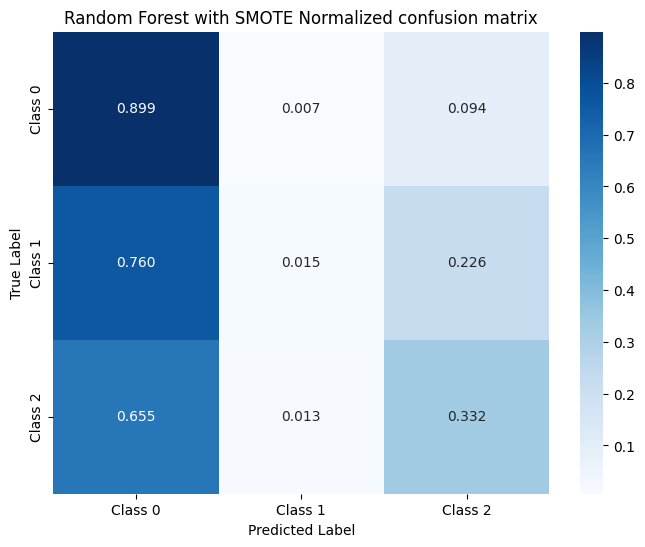

In [33]:
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_rf, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='Random Forest with SMOTE Normalized confusion matrix')

plt.show()

In [34]:
# AdaBoost
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train_smote, y_train_smote)
ab_predictions = ab.predict(X_test_scaled)


print("AdaBoost Accuracy:", accuracy_score(y_test, ab_predictions))
print("---------------------------------")
print("AdaBoost Classification Report:\n", classification_report(y_test, ab_predictions))

/home/cak/Downloads/ML_Project_CLO4/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7362878073547545
---------------------------------
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     57167
           1       0.03      0.01      0.02      1377
           2       0.34      0.68      0.45     10391

    accuracy                           0.74     68935
   macro avg       0.43      0.48      0.43     68935
weighted avg       0.81      0.74      0.76     68935



<Figure size 640x480 with 0 Axes>

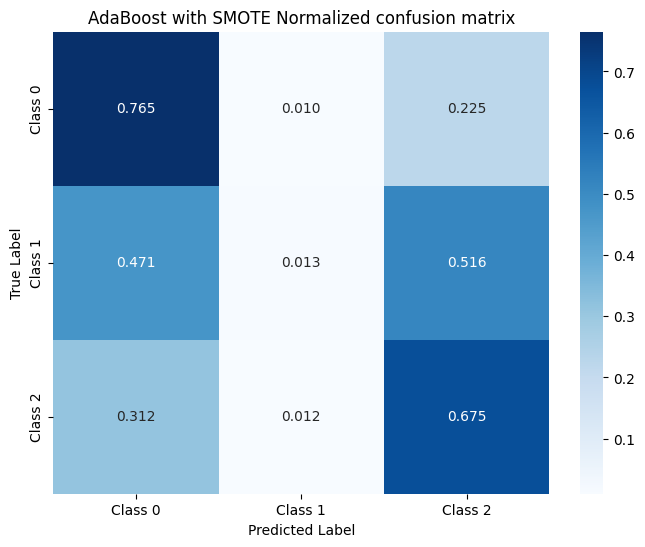

In [35]:
cm_ab = confusion_matrix(y_test, ab_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_ab, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='AdaBoost with SMOTE Normalized confusion matrix')

plt.show()

Model Exploration

In this exploratory segment, we delve deeper into our classification models, fine-tuning their configurations for optimal performance. Within this section, we explore customized variations of the AdaBoost and Random Forest classifiers.

For AdaBoost, we experiment with different hyperparameters, such as the number of estimators and learning rate, aiming to enhance its predictive accuracy. Detailed evaluations, including accuracy scores, classification reports, and confusion matrices, provide valuable insights into the AdaBoost customizations.

In the realm of Random Forest, we explore multiple scenarios. Firstly, we apply calculated class weights to address class imbalance, achieving a more balanced representation of classes. We also vary the number of estimators and utilize Synthetic Minority Over-sampling Technique (SMOTE) to analyze the impact of these adjustments on model performance. Through these tailored approaches, we aim to uncover the most effective configurations for our classification task.

In [36]:
# AdaBoost
ab_custom_1 = AdaBoostClassifier(n_estimators=250, random_state=42,learning_rate=1.9)
ab_custom_1.fit(X_train_smote, y_train_smote)
ab_custom_1_predictions = ab_custom_1.predict(X_test_scaled)

print("AdaBoost Custom 1 Accuracy:", accuracy_score(y_test, ab_custom_1_predictions))
print("---------------------------------")
print("AdaBoost Custom 1 Classification Report:\n", classification_report(y_test, ab_custom_1_predictions))

/home/cak/Downloads/ML_Project_CLO4/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Custom 1 Accuracy: 0.8126931167041416
---------------------------------
AdaBoost Custom 1 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     57167
           1       0.00      0.00      0.00      1377
           2       0.41      0.33      0.36     10391

    accuracy                           0.81     68935
   macro avg       0.43      0.42      0.42     68935
weighted avg       0.78      0.81      0.80     68935



/home/cak/Downloads/ML_Project_CLO4/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cak/Downloads/ML_Project_CLO4/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cak/Downloads/ML_Project_CLO4/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

<Figure size 640x480 with 0 Axes>

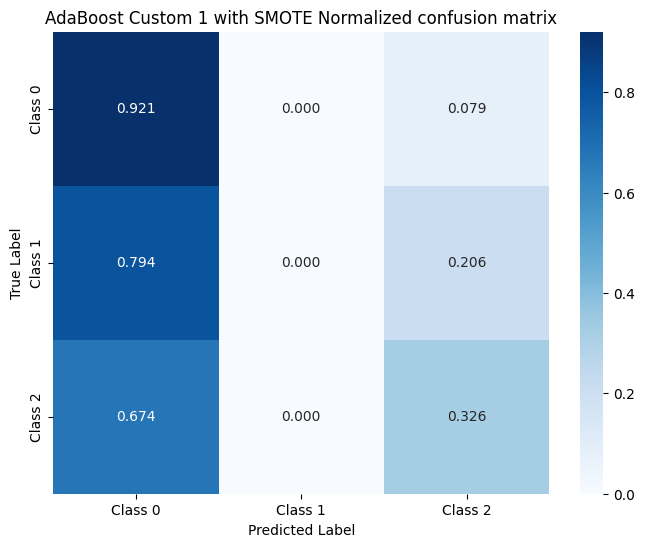

In [37]:
cm_ab_custom_1 = confusion_matrix(y_test, ab_custom_1_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_ab_custom_1, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='AdaBoost Custom 1 with SMOTE Normalized confusion matrix')

plt.show()

In [38]:
# Class distribution values from the user's provided image
class_counts = {0: 213703, 2: 35346, 1: 4631}
# Total number of samples
total_samples = sum(class_counts.values())
# Number of classes
num_classes = len(class_counts)
# Calculate class weights for 'balanced' option
class_weights_balanced = {class_label: total_samples / (num_samples * num_classes)
                          for class_label, num_samples in class_counts.items()}

In [39]:
#Random Forest Customized 1 without SMOTE but specified calculated class weight and n_estimator = 125
rf_custom_1  = RandomForestClassifier(n_estimators=125, random_state=42, n_jobs=-1,class_weight=class_weights_balanced)
rf_custom_1.fit(X_train_scaled,y_train)
rf_custom_1_predictions = rf_custom_1.predict(X_test_scaled)

print("Random Forest Custom 1 Accuracy: ",accuracy_score(y_test,rf_custom_1_predictions))
print("---------------------------------")
print("Random Forest Custom 1 Accuracy:\n",classification_report(y_test,rf_custom_1_predictions))

Random Forest Custom 1 Accuracy:  0.7877420758685718
---------------------------------
Random Forest Custom 1 Accuracy:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     57167
           1       0.02      0.02      0.02      1377
           2       0.35      0.23      0.28     10391

    accuracy                           0.79     68935
   macro avg       0.41      0.38      0.39     68935
weighted avg       0.76      0.79      0.77     68935



<Figure size 640x480 with 0 Axes>

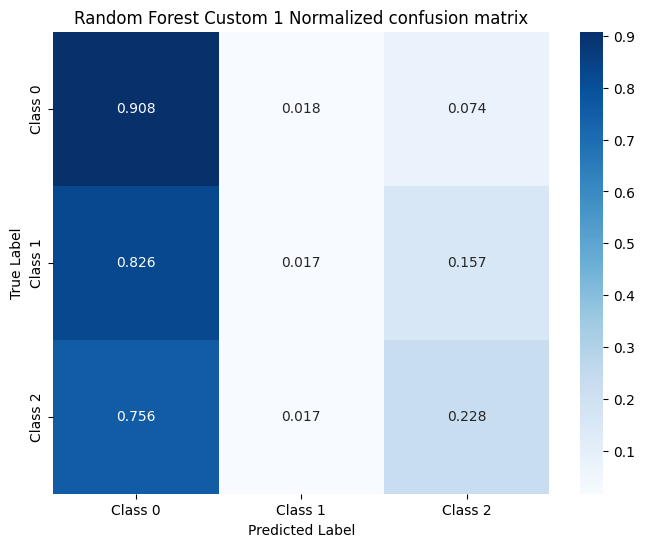

In [40]:
cm_rf_custom_1 = confusion_matrix(y_test, rf_custom_1_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_rf_custom_1, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='Random Forest Custom 1 Normalized confusion matrix')

plt.show()

In [41]:
#Random Forest Customized 2 with SMOTE but n_estimator = 250
rf_custom_2  = RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1)
rf_custom_2.fit(X_train_smote,y_train_smote)
rf_custom_2_predictions = rf_custom_2.predict(X_test_scaled)
print("Random Forest Custom 2 Accuracy: ",accuracy_score(y_test,rf_custom_2_predictions))
print("---------------------------------")
print("Random Forest Custom 2 Accuracy:\n",classification_report(y_test,rf_custom_2_predictions))

Random Forest Custom 2 Accuracy:  0.7961703053601219
---------------------------------
Random Forest Custom 2 Accuracy:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     57167
           1       0.04      0.01      0.02      1377
           2       0.38      0.33      0.36     10391

    accuracy                           0.80     68935
   macro avg       0.43      0.42      0.42     68935
weighted avg       0.78      0.80      0.79     68935



<Figure size 640x480 with 0 Axes>

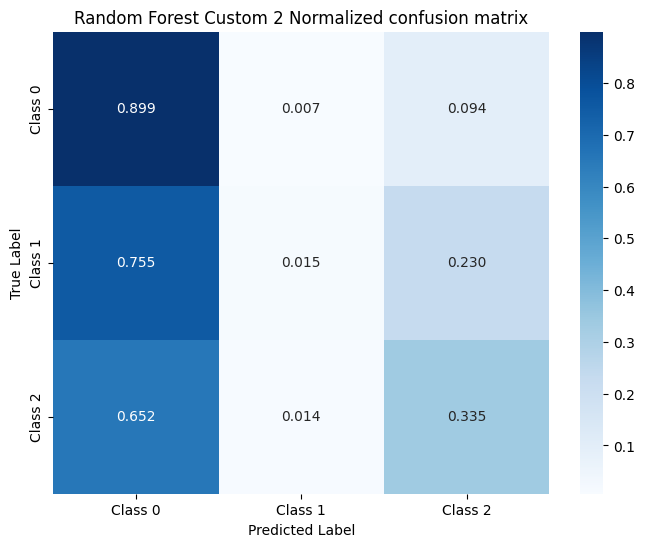

In [42]:
cm_rf_custom_2 = confusion_matrix(y_test, rf_custom_2_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_rf_custom_2, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='Random Forest Custom 2 Normalized confusion matrix')

plt.show()

In [43]:
#Random Forest Customized 3 without SMOTE but specified calculated class weight and n_estimator = 250
rf_custom_3  = RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1,class_weight="balanced_subsample")
rf_custom_3.fit(X_train_smote,y_train_smote)
rf_custom_3_predictions = rf_custom_2.predict(X_test_scaled)

print("Random Forest Custom 3 Accuracy: ",accuracy_score(y_test,rf_custom_3_predictions))
print("---------------------------------")
print("Random Forest Custom 3 Accuracy:\n",classification_report(y_test,rf_custom_3_predictions))

Random Forest Custom 3 Accuracy:  0.7961703053601219
---------------------------------
Random Forest Custom 3 Accuracy:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     57167
           1       0.04      0.01      0.02      1377
           2       0.38      0.33      0.36     10391

    accuracy                           0.80     68935
   macro avg       0.43      0.42      0.42     68935
weighted avg       0.78      0.80      0.79     68935



<Figure size 640x480 with 0 Axes>

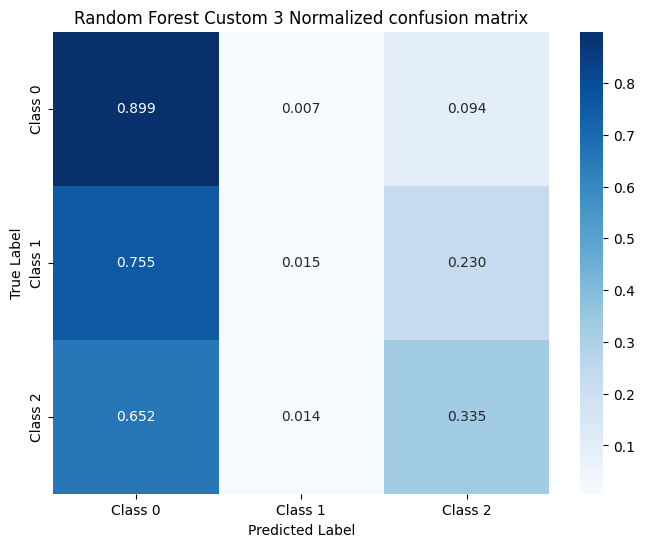

In [44]:
cm_rf_custom_3 = confusion_matrix(y_test, rf_custom_3_predictions)

# Plot normalized confusion matrix
plt.figure()
plot_normalized_confusion_matrix(cm_rf_custom_3, classes=['Class 0', 'Class 1', 'Class 2'],
                      title='Random Forest Custom 3 Normalized confusion matrix')

plt.show()

#### Summary and Methods

Summary

In this comprehensive analysis of a classification task focused on predicting diabetes using machine learning, we have followed a structured approach. The project encompasses data exploration, preprocessing, model building, and evaluation. We leverage ensemble methods, primarily Random Forest and AdaBoost, to create predictive models. Additionally, we explore various model configurations to fine-tune their performance. The dataset undergoes careful examination, and techniques such as SMOTE, feature scaling, and outlier handling are applied to ensure data quality. Furthermore, we delve into exploratory data analysis (EDA) to gain insights into the dataset's characteristics and correlations. We evaluate the models using essential metrics and visualization tools, providing a holistic view of their performance. Throughout this process, our aim is to develop robust classification models for diabetes prediction.

Methods

1. Dataset Exploration:

- Load the dataset and examine its structure and summary statistics.
- Address missing values and convert specific columns to integer data types.
- Identify and remove duplicate records from the dataset.

2. Exploratory Data Analysis (EDA):

- Calculate the correlation matrix and visualize it using a heatmap.
- Identify and remove features with weak correlations.
- Perform outlier analysis using the Interquartile Range (IQR) method.
- Scale select features using the RobustScaler.

3. Data Preparation:

- Split the dataset into features (X) and the target variable (y).
- Perform a train-test split (70% training, 30% testing) with data scaling.
- Apply Synthetic Minority Over-sampling - Technique (SMOTE) to address class imbalance.

4. Baseline Model Building and Evaluation:

- Create baseline models using Random Forest and AdaBoost classifiers.
- Configure hyperparameters, including the number of estimators and random state.
- Evaluate model performance using accuracy, classification reports, and confusion matrices.

5. Model Exploration:

- Explore customized versions of AdaBoost and Random Forest models with varied hyperparameters.
- Evaluate each custom model's accuracy, classification reports, and confusion matrices.
- Experiment with calculated class weights, SMOTE, and different estimators for Random Forest.


#### Conclusion
In the comparative analysis of AdaBoost and Random Forest classifiers for a multi-class classification problem, AdaBoost Custom 1 emerges as the top performer with the highest overall accuracy of 81.63%. It excels in predicting Class 0 (precision: 0.87, recall: 0.92, F1-score: 0.89), demonstrating its effectiveness for the majority class. However, its complete failure to identify any instances of Class 1 (precision, recall, and F1-score all at 0.00) raises concerns about its suitability in scenarios where Class 1 prediction is crucial, possibly indicating overfitting to the majority classes.

On the other hand, the Random Forest models, while having lower overall accuracies (78.77% for Custom 1 and 79.61% for both Customs 2 and 3), show a modest ability to predict Class 1, a crucial factor in cases where this class cannot be overlooked. The identical accuracy achieved by Random Forest Custom 2 and 3, despite their different approaches to handling class imbalance (SMOTE for Custom 2 and "balanced_subsample" for Custom 3), suggests that the improvements from class balancing techniques might have reached their limits and that other factors like feature engineering and model complexity may be more influential in enhancing performance.

Given these insights, the choice of the optimal model depends on the specific requirements of the application. AdaBoost Custom 1 is suitable for scenarios prioritizing overall accuracy, while a Random Forest model would be more appropriate where accurate prediction of Class 1 is essential.

#### Suggestion
Better and balanced data is needed to get the better model

#### Presentation Video URL
https://telkomuniversityofficial.sharepoint.com/sites/Bapak-bapak/Dokumen%20Berbagi/General/Recordings/General-20231227_141648-Meeting%20Recording.mp4?web=1&referrer=Teams.TEAMS-ELECTRON&referrerScenario=MeetingChicletGetLink.view.view